# Data-driven prediction model on Diabetes Patient's Hospital Readmission

In the realm of contemporary healthcare, the management and treatment of diabetes remain a formidable challenge. Diabetes is not only a prevalent chronic disease affecting billions globally but also its complications often necessitate complex and ongoing medical interventions. In this context, hospital readmission of diabetes patients has emerged as a significant issue, imposing substantial economic and psychological burdens on patients, as well as straining healthcare system resources.

Addressing this issue, this study aims to develop a data-driven predictive model to estimate the risk and timing of hospital readmission for diabetes patients. The development of this model is predicated on an in-depth analysis of historical medical records, encompassing but not limited to patient demographics, medical history, treatment records, and biochemical markers. Employing advanced data preprocessing techniques and machine learning algorithms, such as Random Forests, Support Vector Machines, and Neural Networks, this research seeks to provide an accurate and reliable predictive tool. This tool is intended not only to aid healthcare providers in making more informed decisions regarding resource allocation and patient management but also to offer more personalized and timely medical interventions for diabetes patients.

By reducing unnecessary readmissions, this model is anticipated to significantly enhance the quality of life for diabetes patients and alleviate their economic burdens. Concurrently, it offers the healthcare system an effective tool to better cope with the growing patient demand and the limitations of healthcare resources

Our goal is to:
1. Preprocess the diabetes patient's data, take out useless information.
2. Find factors which are the strongest predictors of hospital readmission in diabetic patients
3. Compare different method to find the best fit model for prediction
4. Try our best to predict hospital readmission in this dataset with limited features


In [71]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from IPython.display import display

# DataSet Description


In [72]:
file_path = "./features/FeatureTable.xlsx"
columns_to_read = ["Variable Name","Description"]

pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False)  
pd.set_option('display.max_colwidth', None)  

feature_table = pd.read_excel(file_path, usecols=columns_to_read)
feature_table

,Variable Name,Description
0,encounter_id,Unique identifier of an encounter
1,patient_nbr,Unique identifier of a patient
2,race,"Values: Caucasian, Asian, African American, Hispanic, and other"
3,gender,"Values: male, female, and unknown/invalid"
4,age,"Grouped in 10-year intervals: [0, 10), [10, 20),..., [90, 100)"
5,weight,Weight in pounds.
6,admission_type_id,"Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available"
7,discharge_disposition_id,"Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available"
8,admission_source_id,"Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital"
9,time_in_hospital,Integer number of days between admission and discharge


# Raw Data Exploration

In [73]:
class DataExploration(object):
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path)

        # Assuming 'data' is the dataset 
        self.df = pd.DataFrame(self.data)

    def pie_race_distribution(self):
        # Plot the pie chart for Race Distribution

        # Calculate the counts for different races
        Caucasian_count = len(self.data[self.data['race'] == 'Caucasian'])
        Asian_count = len(self.data[self.data['race'] == 'Asian'])
        African_count = len(self.data[self.data['race'] == 'African'])
        American_count = len(self.data[self.data['race'] == 'American'])
        Hispanic_count = len(self.data[self.data['race'] == 'Hispanic'])
        other_count = len(self.data[self.data['race'] == 'Other'])

        total_count = len(self.data)

        # Calculate percentages
        p1 = (Caucasian_count / total_count) * 100
        p2 = (Asian_count / total_count) * 100
        p3 = (African_count / total_count) * 100
        p6 = (American_count / total_count) * 100
        p5 = (Hispanic_count / total_count) * 100
        p4 = (other_count / total_count) * 100

        print(f"Percentage Caucasian: {p1}%")
        print(f"Percentage Asian: {p2}%")
        print(f"Percentage African: {p3}%")
        print(f"Percentage American: {p6}%")
        print(f"Percentage Hispanic: {p5}%")
        print(f"Percentage Other: {p4}%")

        labels = ['Caucasian', 'Asian', 'African', 'other', 'Hispanic', 'America']
        sizes = [p1, p2, p3, p4, p5, p6]  # Portions for the pie chart

        # Set the colors
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'pink']

        # Plot the figure
        plt.figure(figsize=(20, 20))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

        # Set the title
        plt.title('Race distribution')

        # Show the plot
        plt.axis('equal')  # Ensure it's a circle and not an ellipse
        plt.legend() 
        plt.show()

    def pie_a1cresult(self):
        # Plot the pie chart for A1Cresult Value

        # Calculate the counts for different A1Cresult categories
        normal_count = len(self.data[self.data['A1Cresult'] == 'Normal'])
        gt_8_count = len(self.data[self.data['A1Cresult'] == '>8'])
        gt_7_count = len(self.data[self.data['A1Cresult'] == '>7'])
        none_count = len(self.data[self.data['A1Cresult'] == 'None'])

        total_count = len(self.data)

        # Calculate percentages
        p1 = (normal_count / total_count) * 100
        p2 = (gt_8_count / total_count) * 100
        p3 = (gt_7_count / total_count) * 100
        p4 = (none_count / total_count) * 100

        print(f"Percentage Normal: {p1:.2f}%")
        print(f"Percentage >8: {p2:.2f}%")
        print(f"Percentage >7: {p3:.2f}%")
        print(f"Percentage None: {p4:.2f}%")

        labels = ['Normal', '>8','None', '>7']
        sizes = [p1, p2, p4, p3]  # Portions for the pie chart

        # Set the colors
        colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

        # Plot the figure
        plt.figure(figsize=(8, 8))
        plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

        # Set the title
        plt.title('A1Cresult Value')

        # Show the plot
        plt.axis('equal')  # Ensure it's a circle and not an ellipse
        plt.legend(loc='upper right') 
        plt.show()

    def stacked_medicine_use_condition(self):
        # PLot the Stacked Column Chart for Medicine use condition

        # Define all the medicines
        medicines = ['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']  # 添加其他药物的名称

        # create a vaccume list to fill the percentage
        percentages = []

        # write a loop to deal all of the medicines
        for med in medicines:
            # write the percentage for each medicines
            values_count = self.data[med].value_counts(normalize=True) * 100
            
            # for none value use o to replace
            for value in ['No', 'Steady', 'Up', 'Down']:
                if value not in values_count:
                    values_count[value] = 0
            
            # put the percentage into the value list
            percentages.append([values_count['No'], values_count['Steady'], values_count['Up'], values_count['Down']])

        # define medicine name
        medication_labels = [med.capitalize() for med in medicines]  # Using the first character

        # define the colour 
        colors = ["steelblue","dodgerblue", "lightskyblue", "blue"]

        # create figure
        fig, ax = plt.subplots(figsize=(12, 8))
        fig.patch.set_facecolor('white') 

        bottom = np.zeros(len(medicines))  # initialise the bottom height

        for j in range(len(percentages[0])):
            values = [percentages[i][j] for i in range(len(medicines))]
            ax.bar(medicines, values, color=colors[j], bottom=bottom, label=["No", "Steady", "Up", "Down"][j])
            bottom += np.array(values)  # update the height

        # set the title 
        ax.set_title("Relationship between readmission and medicines", fontsize=15)
        ax.set_xlabel("Name of medicines")
        ax.set_ylabel("Percentage")
        ax.legend()  

        plt.xticks(medicines, medication_labels)  # x axis is the medicine name
        plt.xticks(rotation=45)  # rotate name avoid overlap
        ax.set_ylim(0, 105) 
        plt.tight_layout()  
        plt.show()

    def histogram_age_groups(self):
        # PLot the Histogram and find the skewness of the Age groups.

        # Create a numeric mapping for age categories for all patients
        age_mapping = {age: idx for idx, age in enumerate(sorted(self.data['age'].unique()))}
        self.data['age_numeric'] = self.data['age'].map(age_mapping)

        # Calculate skewness for the age category
        age_skewness = skew(self.data['age_numeric'])

        # Plot the histogram with KDE and display the skewness on the plot
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(data=self.data, x='age_numeric', bins=len(age_mapping), kde=True, kde_kws={"bw_adjust": 3.5})
        plt.title("Age Distribution with KDE for All Patients")
        plt.xlabel("Age Category")
        plt.ylabel("Density")
        plt.xticks(ticks=range(len(age_mapping)), labels=sorted(self.data['age'].unique()), rotation=45)
        plt.grid(True)

        # Create a second y-axis to show the count
        ax2 = ax.twinx()
        sns.histplot(data=self.data, x='age_numeric', bins=len(age_mapping), ax=ax2, alpha=0.5)
        ax2.set_ylabel('Count')

        # Annotate skewness on the plot
        ax.text(x=0.95, y=0.95, s=f"Skewness: {age_skewness:.2f}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

    def histogram_time_in_hospital(self):
        # PLot the Histogram and find the skewness of time in hospital.

        # Calculate skewness for the time in hospital
        time_in_hospital_skewness = skew(self.df['time_in_hospital'])

        # Plot the histogram with KDE and display the skewness on the plot
        plt.figure(figsize=(10, 6))
        ax = sns.histplot(data=self.df, x='time_in_hospital', bins=max(self.df['time_in_hospital']), kde=True, kde_kws={"bw_adjust": 3.5})
        plt.title("Time in Hospital Distribution with KDE")
        plt.xlabel("Time in Hospital (days)")
        plt.ylabel("Density")
        plt.xticks(ticks=range(1, max(self.df['time_in_hospital']) + 1))
        plt.grid(True)

        # Create a second y-axis to show the count
        ax2 = ax.twinx()
        sns.histplot(data=self.df, x='time_in_hospital', bins=max(self.df['time_in_hospital']), ax=ax2, alpha=0.5)
        ax2.set_ylabel('Count')

        # Annotate skewness on the plot
        ax.text(x=0.95, y=0.95, s=f"Skewness: {time_in_hospital_skewness:.2f}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

        plt.show()

In [74]:
de = DataExploration('diabetic_data.csv')

Percentage Caucasian: 74.77841322249081%
Percentage Asian: 0.6298763830748972%
Percentage African: 0.0%
Percentage American: 0.0%
Percentage Hispanic: 2.001650846058605%
Percentage Other: 1.4798655739637991%


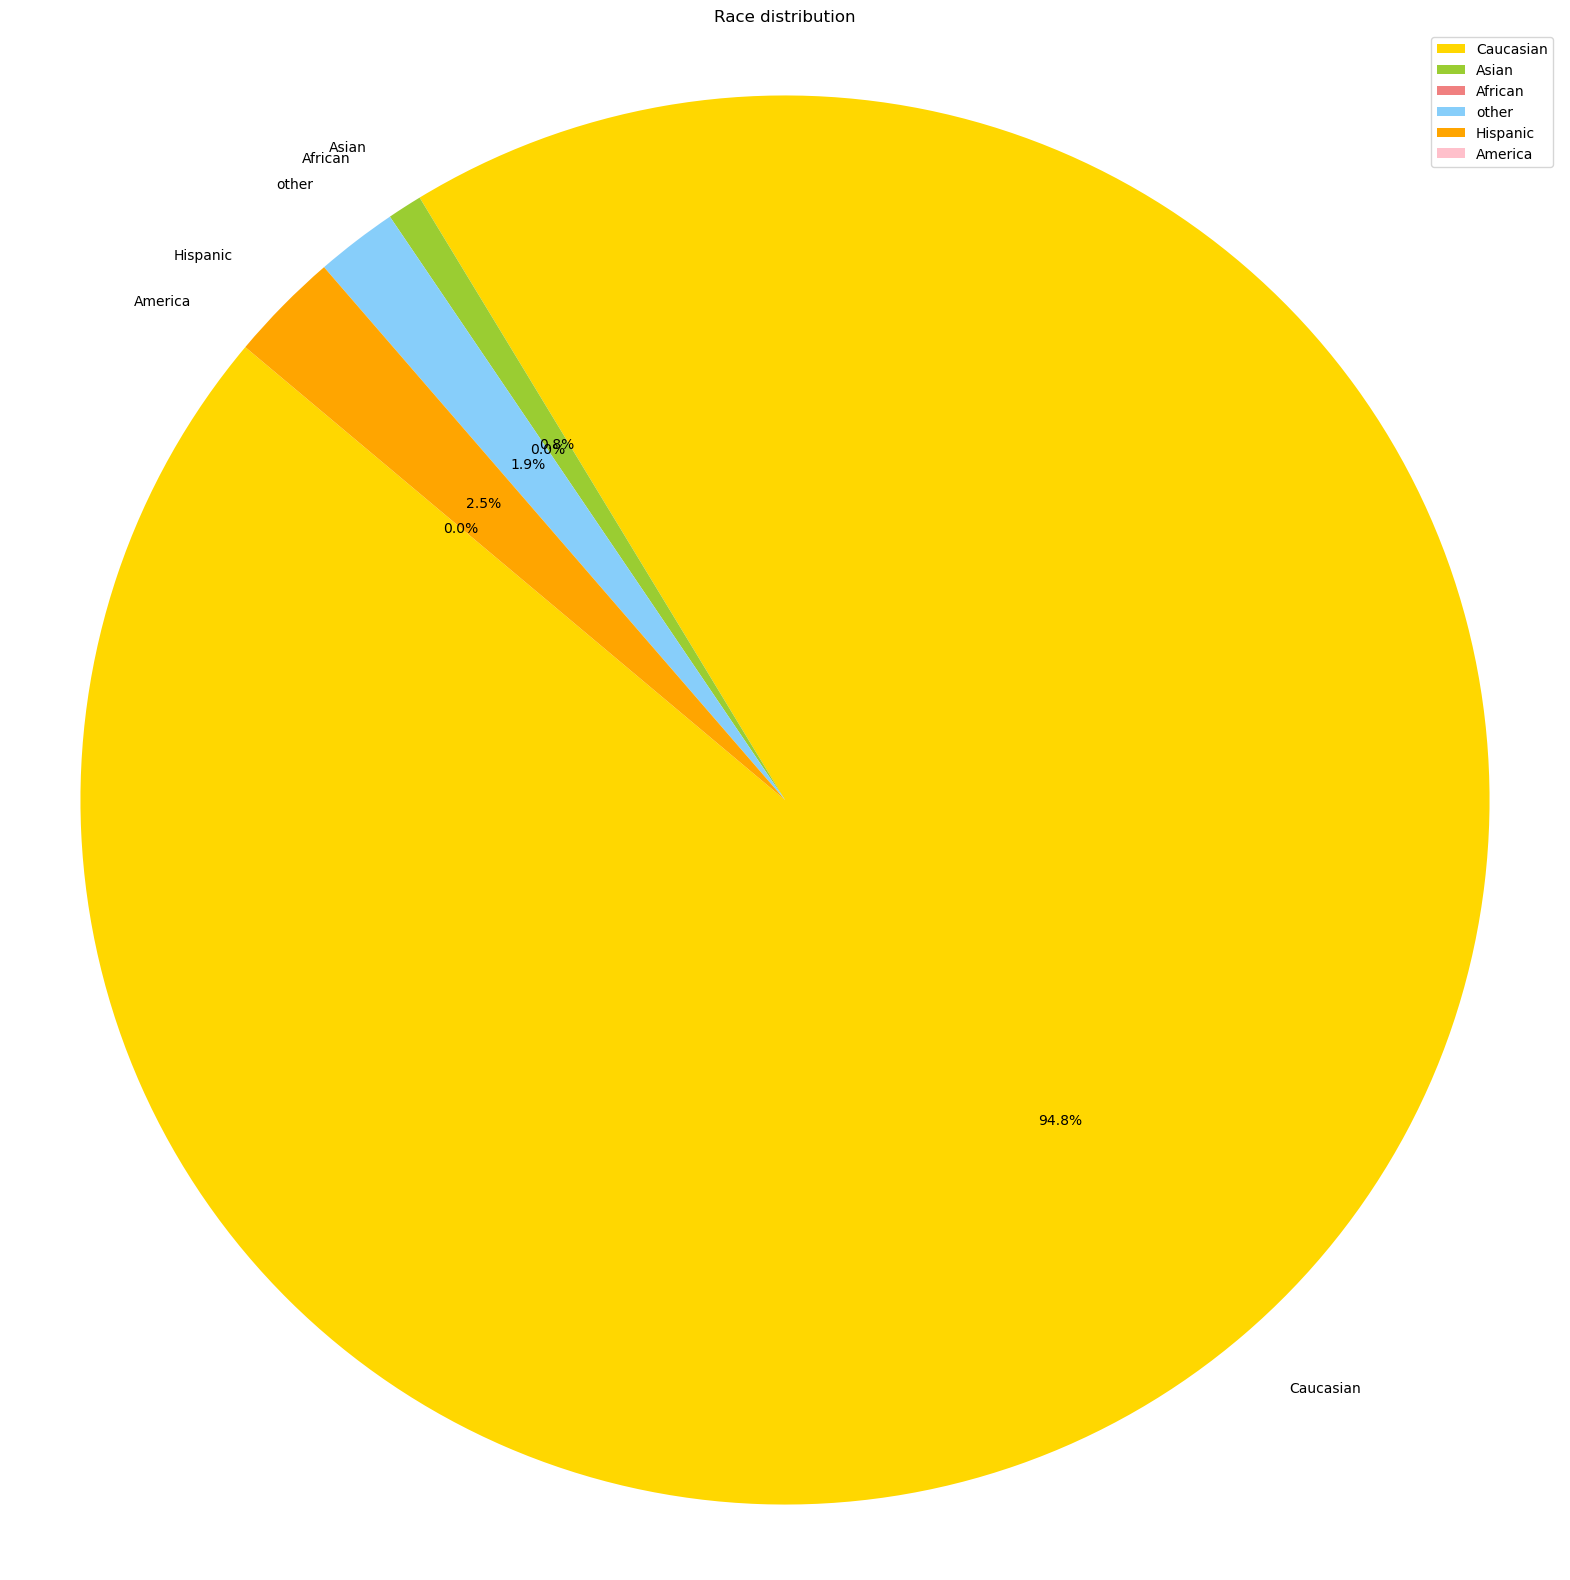

In [75]:
de.pie_race_distribution()

Percentage Normal: 0.00%
Percentage >8: 8.07%
Percentage >7: 3.75%
Percentage None: 0.00%


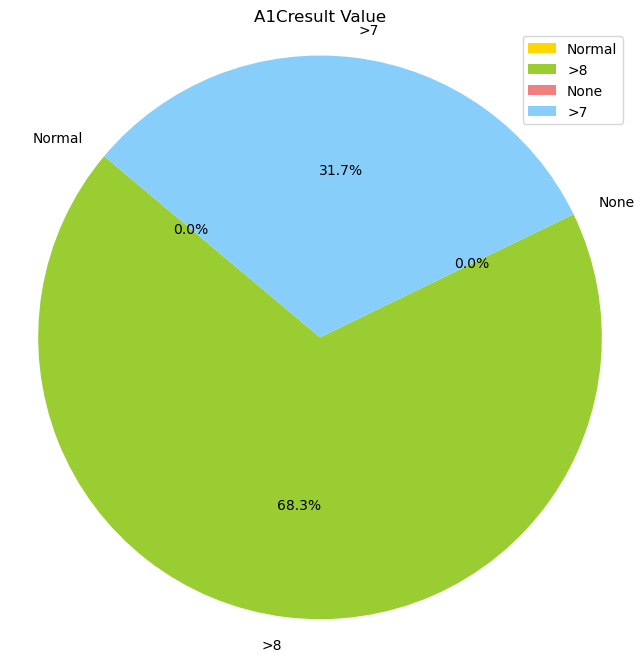

In [76]:
de.pie_a1cresult()

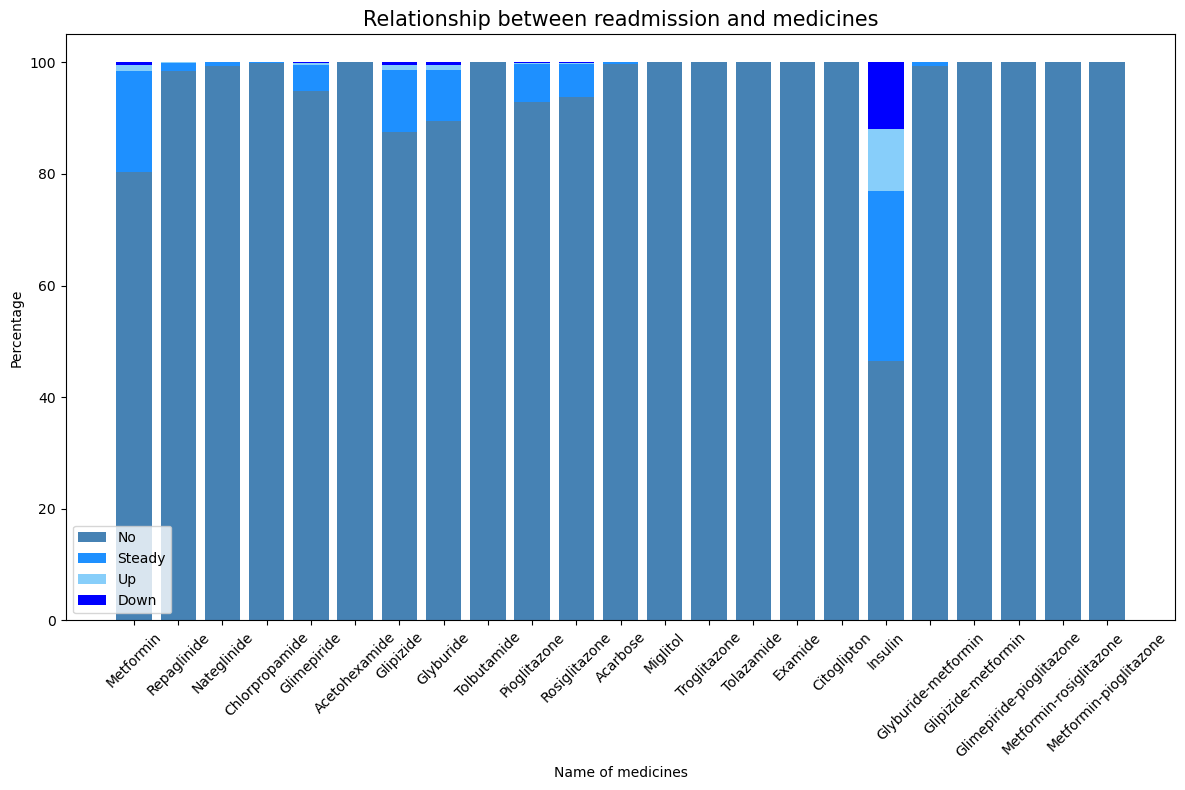

In [77]:
de.stacked_medicine_use_condition()

/Users/yorux/anaconda3/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yorux/anaconda3/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


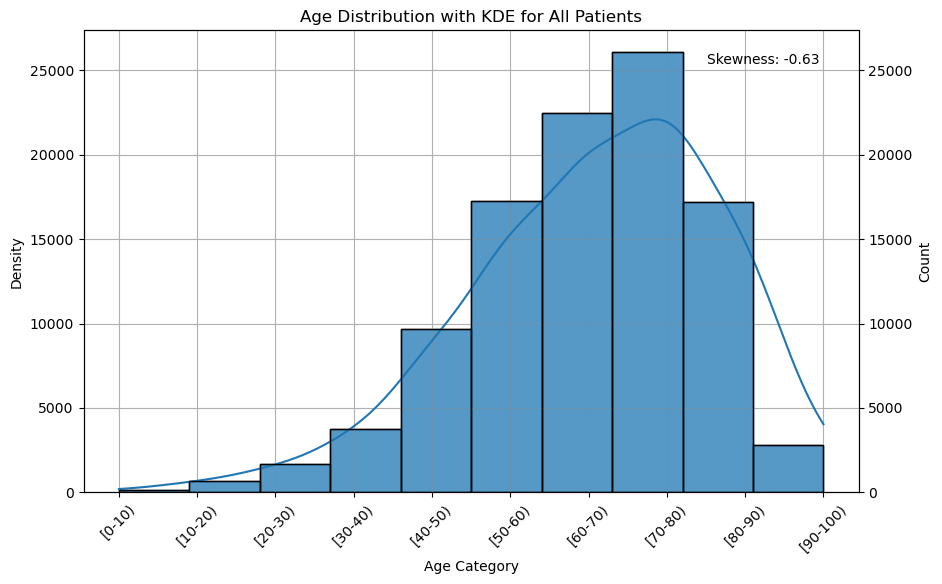

In [78]:
de.histogram_age_groups()

/Users/yorux/anaconda3/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yorux/anaconda3/envs/jupyter/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


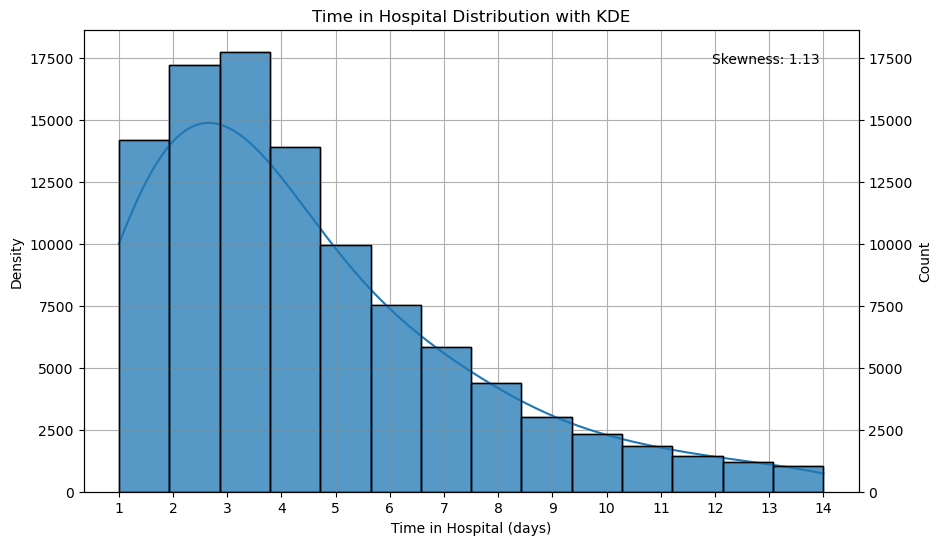

In [79]:
de.histogram_time_in_hospital()

In [80]:
USELESS_DATA_BOUNDARY= 0.3
FEATURE_FILTER_BOUNDARY = 0.03

In [81]:
class DataSet(object):
    def __init__(self, csv_path):
        self.data = pd.read_csv(csv_path)
        self.processed_data = self.data

        self.useless_value_process()
        self.missing_value_process()
        self.tag_transfer()
        self.imputer_process()
        self.normalize()
        self.feature_filter()

    def useless_value_process(self):
        col_del = ['examide', 'citoglipton', 'glimepiride-pioglitazone','encounter_id','patient_nbr']
        self.processed_data.drop(col_del, axis=1, inplace = True)
    
    def missing_value_process(self):
        row_num = len(self.data)
        col_num = len(self.data.columns)
        cols_to_drop = []
        # Check all the features
        for col in range(col_num):
            # qm is short for Question Mark, which indicates a missing value
            qm_num = 0
            for row in range(row_num):
                # Check if the value is missing
                if str(self.data.iat[row,col]) == "?":
                    qm_num += 1

            # Print(qm_num/row_num), the percentage of missing values
            if qm_num/row_num >= USELESS_DATA_BOUNDARY:
                # Print("true") if the percentage is greater than the set boundary, and add the column to columns to drop
                cols_to_drop.append(self.data.columns[col])
        # Drop column
        self.processed_data.drop(columns=cols_to_drop, axis=1, inplace = True)

    def imputer_process(self):
        # Replace the question marks with the most frequently appeared value for each feature
        imp = SimpleImputer(missing_values= -1, strategy='most_frequent')
        imp.fit(self.processed_data)

    def tag_transfer(self): 

        le = LabelEncoder()
        #self.processed_data.replace('?', -1, inplace=True)
        value_to_keep = "?"

        for column in self.processed_data.columns:
            if self.processed_data[column].dtype == 'object':
                values_to_encode = self.processed_data[column] != value_to_keep
                encoded_values = le.fit_transform(self.processed_data.loc[values_to_encode, column])
                self.processed_data[column] = le.fit_transform(self.processed_data[column])
                self.processed_data[column].fillna(self.processed_data[column], inplace=True)

    def get_integer_mapping(self, le):
    
        res = {}
    
        for cl in le.classes_:
    
            res.update({cl:le.transform([cl])[0]})
    
        return res

    def normalize(self):
        # Normalize data using StandardScaler
        scaler = StandardScaler()
        column_names = self.processed_data.columns

        # Fit and transform the data
        self.processed_data = scaler.fit_transform(self.processed_data)

        # Convert the normalized data back to a DataFrame
        self.processed_data = pd.DataFrame(self.processed_data, columns=column_names)

        # Print normalized data
        print(self.processed_data)

    def feature_filter(self):
        importances = self.processed_data.drop('readmitted', axis=1).apply(lambda x: x.corr(self.processed_data.readmitted))

        # 只保留相关性高于阈值的特征
        importances = importances[importances.abs() > FEATURE_FILTER_BOUNDARY]

        # 获取排序后的索引
        indices = np.argsort(importances)

        plt.title('Readmitted')
        plt.barh(range(len(indices)), importances[indices], color='g', align='center')
        plt.yticks(range(len(indices)), [importances.index[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()


In [82]:
train_data = pd.read_csv('diabetic_data.csv')
test_data = pd.read_csv('diabetic_data_test.csv')

predictor = train_data.iloc[:,:-1].values
response = train_data.iloc[:,-1].values

predictor,response 

(array([[2278392, 8222157, 'Caucasian', ..., 'No', 'No', 'No'],
        [149190, 55629189, 'Caucasian', ..., 'No', 'Ch', 'Yes'],
        [64410, 86047875, 'AfricanAmerican', ..., 'No', 'No', 'Yes'],
        ...,
        [443854148, 41088789, 'Caucasian', ..., 'No', 'Ch', 'Yes'],
        [443857166, 31693671, 'Caucasian', ..., 'No', 'Ch', 'Yes'],
        [443867222, 175429310, 'Caucasian', ..., 'No', 'No', 'No']],
       dtype=object),
 array(['NO', '>30', 'NO', ..., 'NO', 'NO', 'NO'], dtype=object))

            race    gender       age  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient    diag_1    diag_2    diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide   insulin  glyburide-metformin  glipizide-metformin  metformin-rosiglitazone  metformin-pioglitazone    change  diabetesMed  readmitted
0       0.427557 -0.927397 -3.824600           2.750800                  4.031022            -1.169873         -1.137649           -0.106517       -0.785398        -1.848268          -0.291461          -0.21262         -0.503276 -1.325025  2.412242  2.123815         -3.321596       0.211734   0.415160  -0.449191    -0.113771    -0.079636       -0.027675    -0.209121  

/var/folders/f7/9y25vsd52n13lfvkbwc3yvch0000gn/T/ipykernel_29241/4162621319.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(range(len(indices)), importances[indices], color='g', align='center')


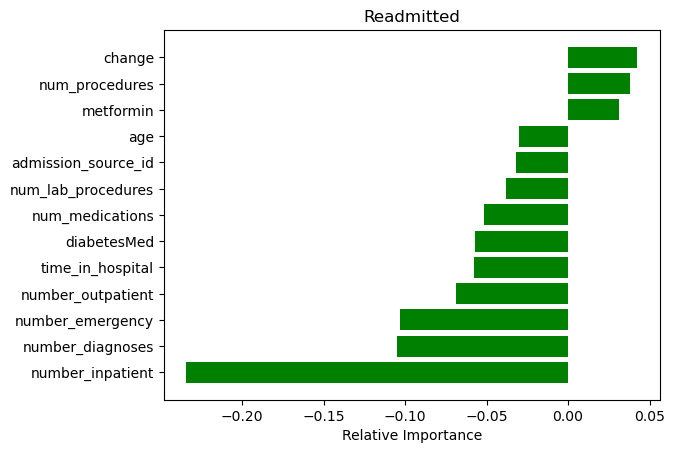

           race    gender       age  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient    diag_1    diag_2    diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone   acarbose  miglitol  troglitazone  tolazamide   insulin  glyburide-metformin  glipizide-metformin  metformin-rosiglitazone  metformin-pioglitazone    change  diabetesMed  readmitted
0      0.437862 -0.923795 -3.830404           2.724943                  4.064813            -1.156490         -1.148831           -0.114179       -0.790775        -1.842772          -0.305997         -0.243481         -0.513315 -1.320036  2.134067  2.012517         -3.318834       0.213462   0.416055  -0.435540    -0.110892    -0.081877       -0.029751    -0.204494   

/Users/yorux/anaconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/yorux/anaconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/f7/9y25vsd52n13lfvkbwc3yvch0000gn/T/ipykernel_29241/4162621319.py:89: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.barh(range(len(indices)), importances[indices], color='g', align='center')


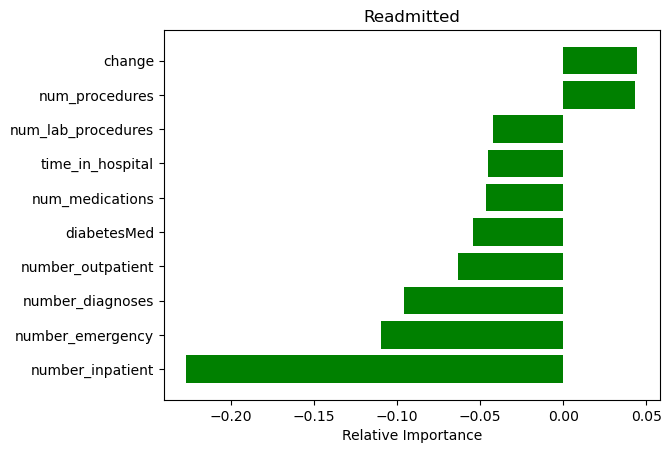

In [83]:
train_data = DataSet('diabetic_data.csv')
test_data = DataSet('diabetic_data_test.csv')

train_data.processed_data.to_csv("test.csv",index=False)

In [84]:
# Heat map
import numpy as np
import pandas as pd

file_path = 'test.csv'

# Load CSV data into a Pandas DataFrame
data = pd.read_csv(file_path)

# Find the covariance matrix of the dataset
cov_matrix = np.cov(data, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[ 1.00000983  0.05527198  0.11468466 ... -0.00932487 -0.00636667
  -0.01518423]
 [ 0.05527198  1.00000983 -0.05053594 ... -0.01490505  0.01590142
   0.01453304]
 [ 0.11468466 -0.05053594  1.00000983 ...  0.03601923 -0.0226014
  -0.03027152]
 ...
 [-0.00932487 -0.01490505  0.03601923 ...  1.00000983 -0.50637512
   0.04250394]
 [-0.00636667  0.01590142 -0.0226014  ... -0.50637512  1.00000983
  -0.05730618]
 [-0.01518423  0.01453304 -0.03027152 ...  0.04250394 -0.05730618
   1.00000983]]


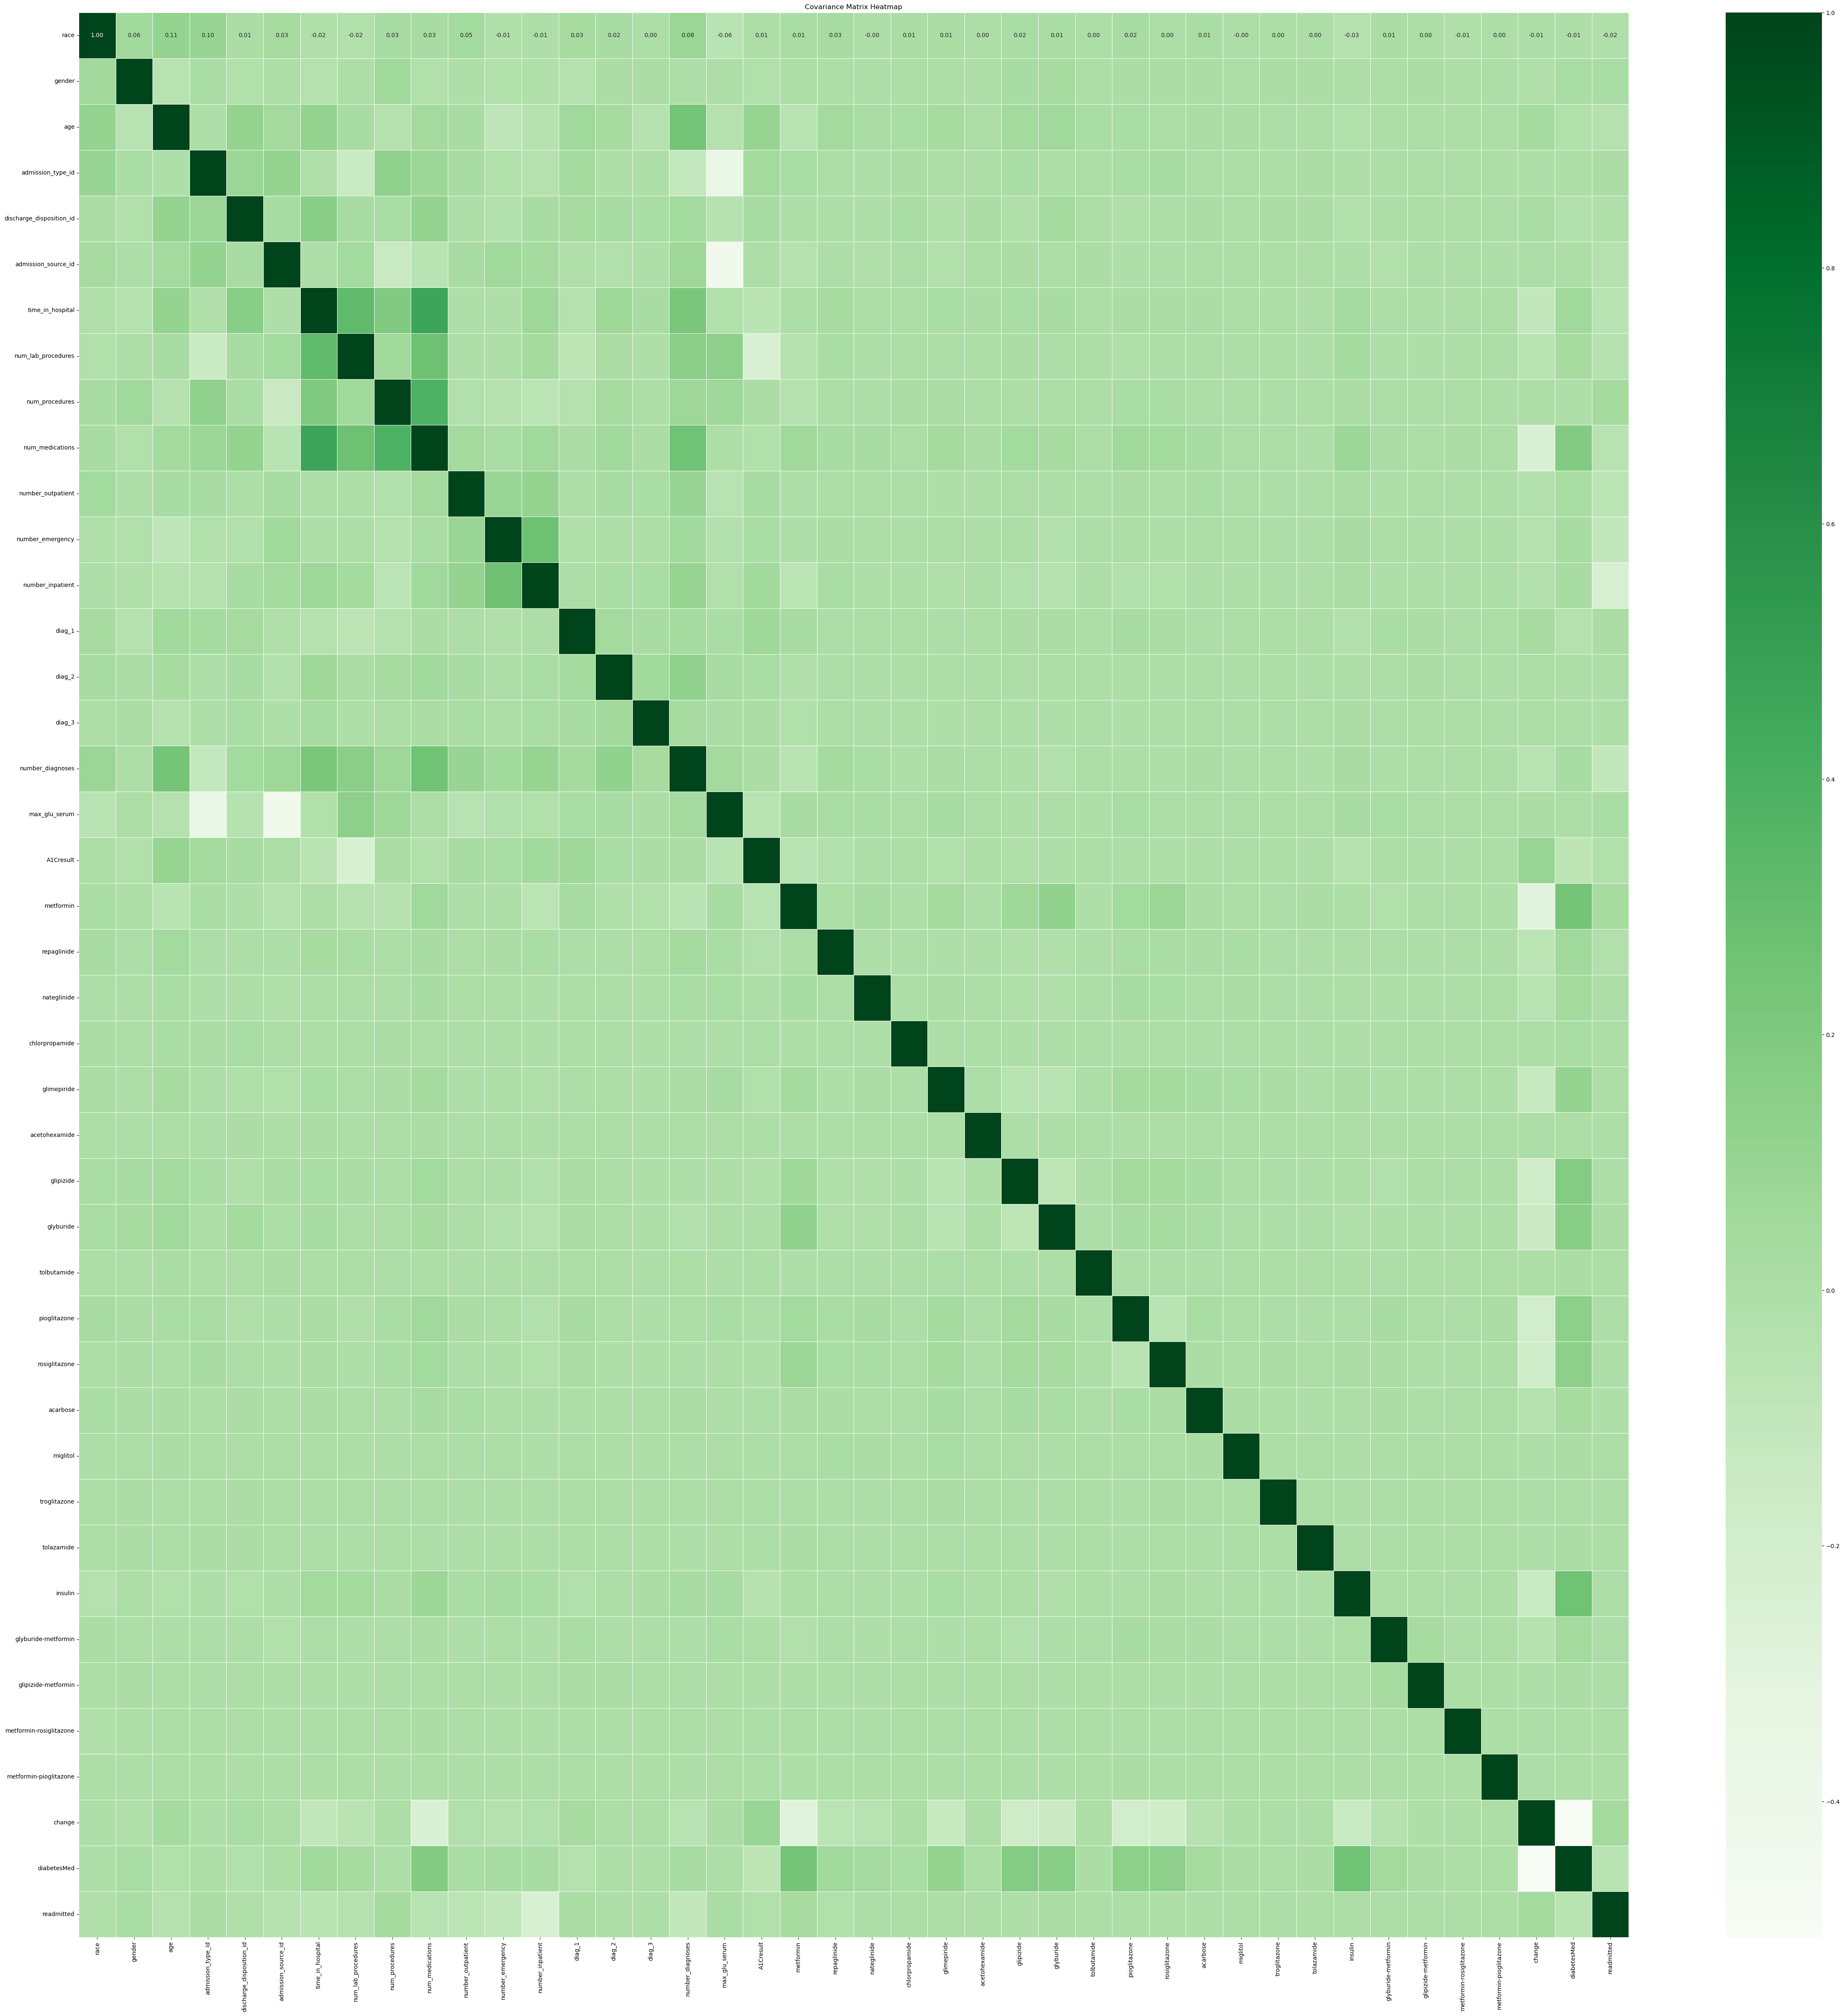

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the covariance matrix
cov_df = pd.DataFrame(cov_matrix, columns=data.columns, index=data.columns)

# Create a heatmap using seaborn
plt.figure(figsize=(60, 60))
sns.heatmap(cov_df, annot=True, cmap='Greens', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

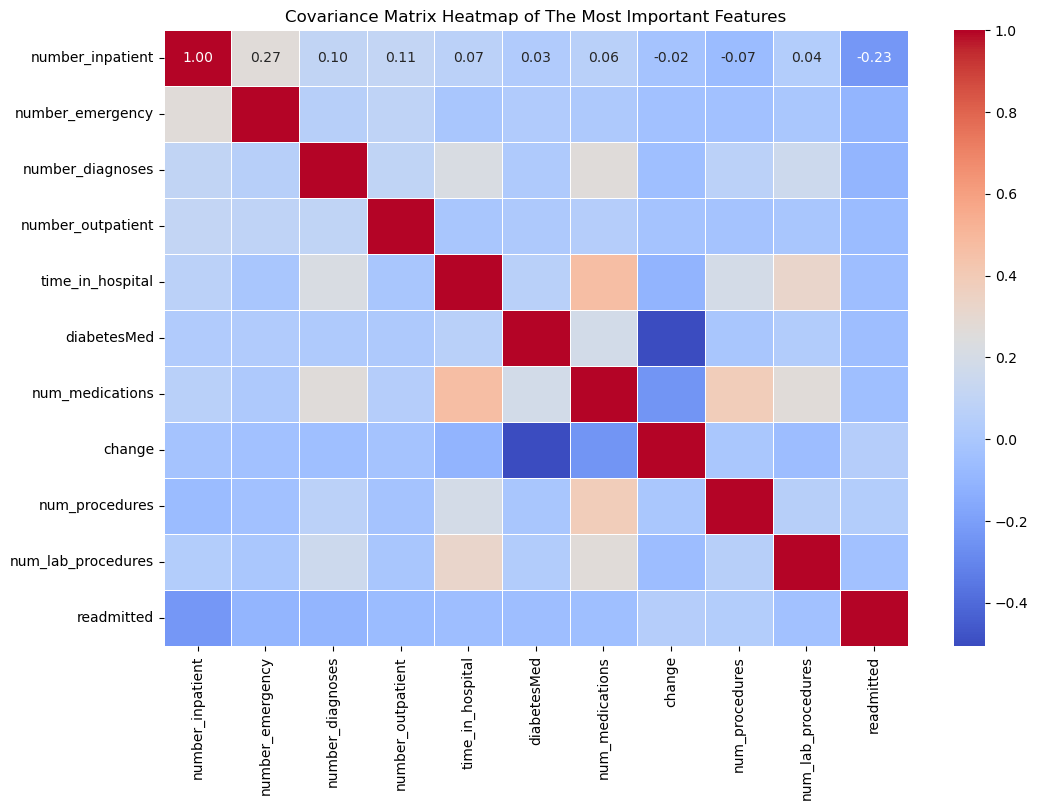

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset 
file_path = 'test.csv'
data = pd.read_csv(file_path)

# Select the relevant features and the target variable
selected_features = [
    'number_inpatient', 'number_emergency', 'number_diagnoses',
    'number_outpatient', 'time_in_hospital', 'diabetesMed',
    'num_medications', 'change', 'num_procedures', 'num_lab_procedures', 'readmitted'
]

# Create a subset of the data with the selected features
subset_data = data[selected_features]

# Compute the covariance matrix
cov_matrix = subset_data.cov()

# Plot the covariance matrix heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap of The Most Important Features')
plt.show()